In [3]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

import warnings
warnings.filterwarnings("ignore")

plt.ion()

In [5]:
landmarks_frame = pd.read_csv("data/faces/face_landmarks.csv")

n = 65
img_name = landmarks_frame.iloc[n, 0]
landmarks = landmarks_frame.iloc[n, 1:]
landmarks = np.asarray(landmarks)
landmarks = landmarks.astype("float").reshape(-1, 2)

print("Image name : {}".format(img_name))
print("Landmarks shape : {}".format(landmarks.shape))
print("First 4 Landmarks : {}".format(landmarks[:4]))

Image name : person-7.jpg
Landmarks shape : (68, 2)
First 4 Landmarks : [[32. 65.]
 [33. 76.]
 [34. 86.]
 [34. 97.]]


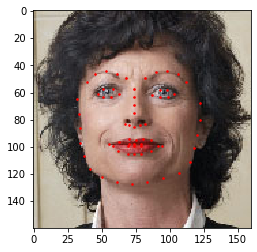

In [6]:
def show_landmarks(image, landmarks):
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], 
                s=10, marker='.', c='r')
    plt.pause(0.001)
    
plt.figure()
show_landmarks(
    io.imread(os.path.join("data/faces", img_name)), landmarks)

In [ ]:
class FaceLandmarksDataset(Dataset):
    def __init__(self, csv_file, root_dir, transfomr=None):
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.landmarks_frame)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        img_name = os.path.join(self.root_dir, 
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = landmarks.astype("float").reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}
        
        if self.transform:
            sample = self.transform(sample)
            
        return sample